# Diamonds

price: dolar (326 - 18623)

carat: (0.2 - 5.01)

cut: (Fair, Good, Very Good, Premium, Ideal)

color: (from J(worst) to D(best))

clarity: (I1(worst), SI2, SI1, VS2, VS1, VVS1, IF(best))

x: length in mm (0 - 10.74)

y: width in mm (0 - 58.9)

z: depth in mm (0 - 31.8)

depth: Percentage of Total Depth = z / mean(x,y) = 2 * z / (x + y) (43-79)

table: The width of the diamond at its widest point (43-95)

In [9]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()

First of all, we take a preview of a data set.

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


Overview of categorical variables;

In [9]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

As you can see, our categorical variables are ordinals, not nominal. That's why we need to do ordinal definition and introduce this order to the system;

In [11]:
from pandas.api.types import CategoricalDtype

In [12]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [13]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [14]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [15]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

Here we define the order and put it in the required argument.

In [16]:
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]

In [17]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True))

In [19]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

We will use **Barplot**.

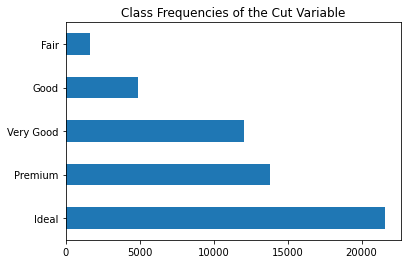

In [25]:
(df["cut"]
.value_counts()
.plot.barh()
.set_title("Class Frequencies of the Cut Variable"));

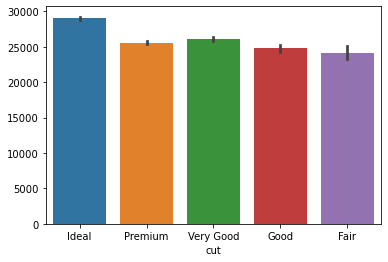

In [10]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

Using the two values together, we create a **catplot** as follows;

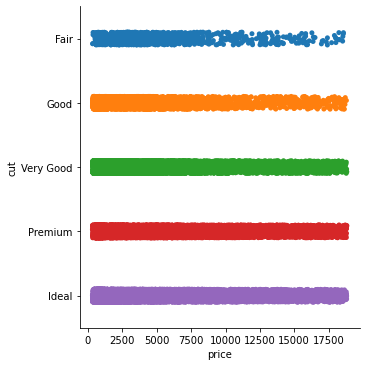

In [34]:
sns.catplot(x = "price", y = "cut", data = df)

We add a third dimension to our chart with hue.

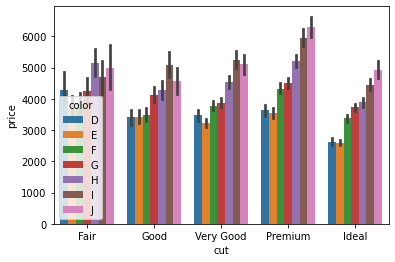

In [38]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

As you can see, the y-axis is not exactly the same as the values from the dataset. The Seaborn library sets this up for us. We can think of it as proportioning in a way. In the process below, we verify this with the groupby () operation.

In [41]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

We use histograms, we make the kde part false because we want to see only the histogram, not a density calculation.

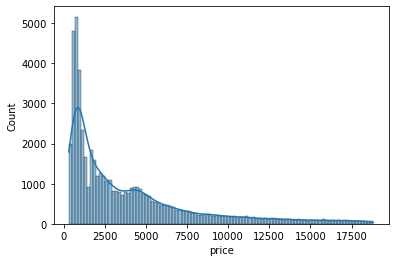

In [30]:
sns.histplot(df.price, bins = 100, kde = True);

If we just want to see the histogram, we can use histplot.

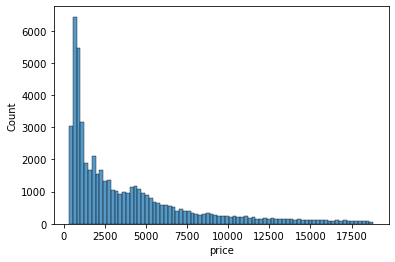

In [35]:
sns.histplot(df.price);

We can only use kdeplot to graph the density.

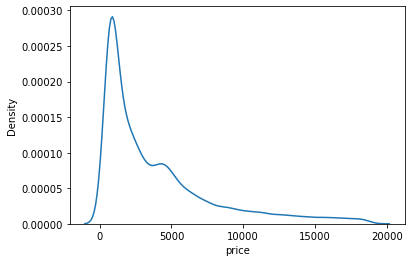

In [36]:
sns.kdeplot(df.price);

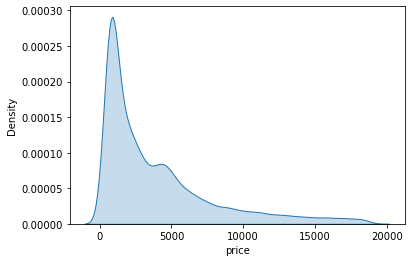

In [37]:
sns.kdeplot(df.price, shade = True);

Here we add another dimension to the existing kdeplot.

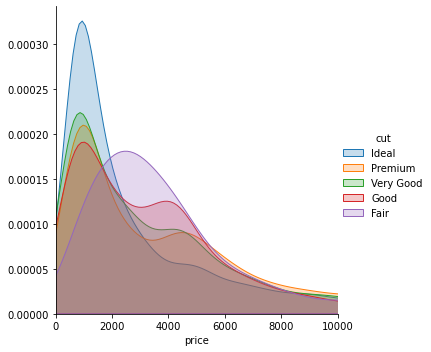

In [43]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);      

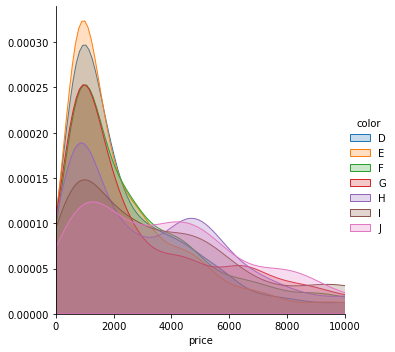

In [44]:
(sns
 .FacetGrid(df,
              hue = "color",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);      

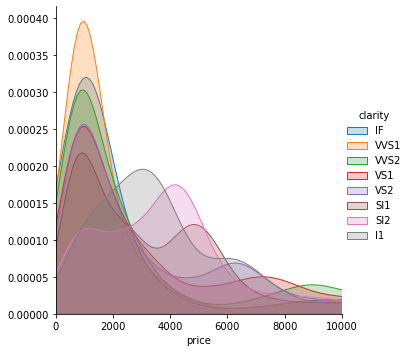

In [46]:
(sns
 .FacetGrid(df,
              hue = "clarity",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);      

Here is the subject that catplot tries to explain to us with point graph;
- Spaces between points are an indication that he is hiding information for us. 
- The fact that the dots are on top of each other is an indication that they are approximately the same.

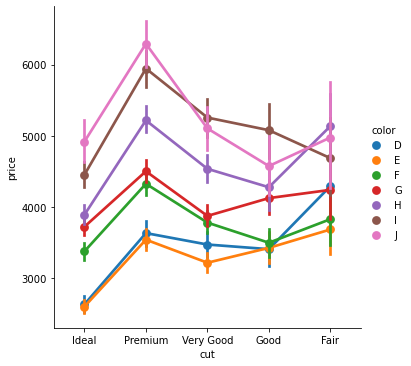

In [47]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);